<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>


**CONTESTO:** *Fatal Police Shooting in the US*

L’omicidio del 2014 di Michael Brown a Ferguson, Missouri, ha dato origine a una protesta culminata nel movimento Black Lives Matter e al crescente interesse dell’opinione pubblica sull’affidabilità e il razzismo delle forze di polizia negli Stati Uniti.

Il Washington Post compila, da gennaio 2015, un database di tutti i casi di omicidio (da arma da fuoco) da parte della polizia negli Stati Uniti. A questo link (https://www.kaggle.com/kwullum/fatal-police-shootings-in-the-us) trovi un dataset pubblico di Kaggle che riporta, oltre a quello del Post, altri quattro database di informazioni demografiche. Il dataset di Kaggle si riferisce al periodo 2015-2016: a questo link (https://github.com/washingtonpost/data-police-shootings) trovi il database del Post aggiornato.

Infine, ecco un database (https://drive.google.com/file/d/1kEikaWCZYVO3ygVvAuVqxYqQPaVJrdYb/view) con la popolazione delle città USA.

**OBIETTIVO:** Analizzerai i dati inerenti ai casi di omicidio (da arma da fuoco) da parte della polizia negli Stati Uniti con lo scopo di evidenziare possibili bias razziali da parte della polizia.

A partire dai dati forniti ti sembra che la polizia americana uccida spoporzionatamente persone appartenenti ad un dato gruppo
prensente nella colonna 'race'?

**NOTA BENE:** Il lavoro va consegnato tenendo a mente che il notebook di Jupyter deve essere simile ad una presentazione da mostrare ad un ipotetico cliente: evitare notebook che siano troppo prolissi e ripetitivi nelle analisi. Scegliere cosa mostrare e perché mostrare quel concetto rispetto ad un altro è una delle capacità da sviluppare per questo workshop

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cowsay

In [8]:
dfk = pd.read_csv(r"fatal-police-shootings-data.csv")
dfc = pd.read_csv(r"PopulationByCity.csv")
dfs = pd.read_csv(r"ShareRaceByCity.csv")

In [10]:
dfk['date'] = pd.to_datetime(dfk['date'], format= '%Y/%m/%d')
dfk["killed"] = 1
dfk.dropna(subset=['race'], inplace=True)
dfk

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,killed
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True,1
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True,1
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True,1
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True,1
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7855,8540,NaN,2022-10-28,shot,NaN,NaN,M,W,Etowah County,AL,False,undetermined,Foot,False,NaN,NaN,True,1
7869,8558,NaN,2022-11-02,shot,gun,NaN,M,O,Jacksonville,FL,False,attack,Foot,False,-81.724,30.333,True,1
7870,8560,Krysten Pretlor,2022-11-03,shot,gun,35.0,M,B,Derry Township,PA,False,other,Car,False,-79.393,40.411,True,1
7876,8571,Jose Cabrera Hernandez,2022-11-04,shot,undetermined,49.0,M,H,Las Vegas,NV,False,undetermined,NaN,False,-115.229,36.127,True,1


## Calcoliamo uccisioni per mese 

<AxesSubplot:xlabel='date'>

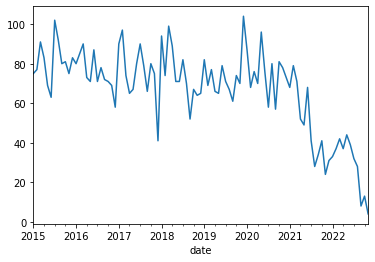

In [11]:
dfk['date'].groupby(dfk["date"].dt.to_period('M')).count().plot(kind='line')

In [14]:
high = dfk[dfk["date"].dt.year==2020].groupby("race")["killed"].count().reset_index()
high

,race,killed
0,A,15
1,B,243
2,H,171
3,N,9
4,O,3
5,W,459


In [13]:
cowsay.cow('Possiamo notare un picco nel 2020, Analizziamo !')

  ________________________________________________
| Possiamo notare un picco nel 2020, Analizziamo ! |
                                                \
                                                 \
                                                   ^__^
                                                   (oo)\_______
                                                   (__)\       )\/\
                                                       ||----w |
                                                       ||     ||


<AxesSubplot:xlabel='race', ylabel='killed'>

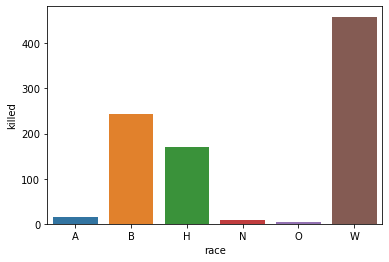

In [15]:
"""
secondo un censo nel 2020(anno preso in questione) lo share della popolazione americana era 60.1% white, 18.2% hispanic or latino, 12.2% black o african american, in proporzione si può notare una grossa quantita di omicidi
targhettati su persone di colore fonte:https://data.census.gov/cedsci/table?q=Hispanic%20or%20Latino&tid=ACSDP5Y2020.DP05
""" 
sns.barplot(x=high["race"], y = high["killed"])

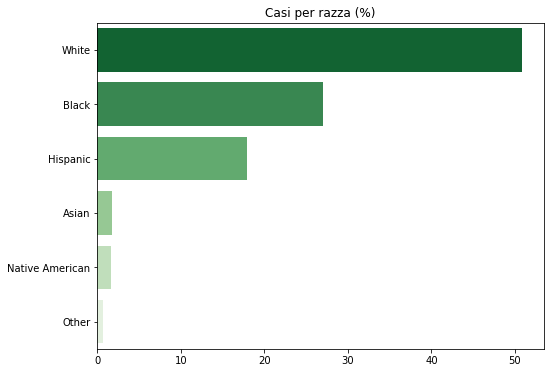

In [31]:
count = dfk.race.value_counts(normalize=True)
count.index = ['White', 'Black', 'Hispanic', 'Asian', 'Native American', 'Other']

f, ax = plt.subplots(1,1, figsize=(8,6))
sns.barplot(y=count.index, x=count.values*100, palette='Greens_r')
ax.set_title('Casi per razza (%)');

In [17]:
cowsay.cow('Calcoliamo i casi per razza in proporzione alla  propria share di popolazione !')

  _________________________________________________
 /                                                 \
| Calcoliamo i casi per razza in proporzione alla   |
| propria share di popolazione !                    |
 \                                                 /
                                                 \
                                                  \
                                                    ^__^
                                                    (oo)\_______
                                                    (__)\       )\/\
                                                        ||----w |
                                                        ||     ||


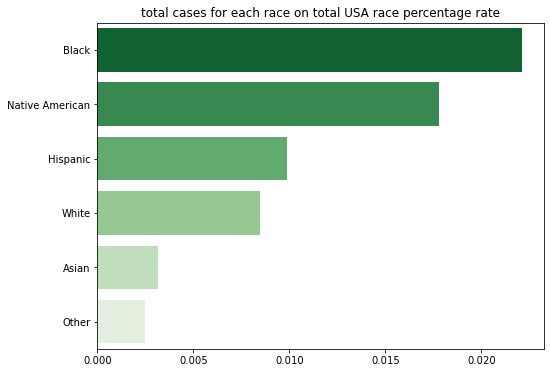

In [32]:
share_race_usa_2020 = pd.Series([60.1, 12.2, 0.9, 5.6, 18.2, 3.0], index=['White','Black','Native American','Asian','Hispanic','Other'])

count_races = count / share_race_usa_2020
count_races = count_races.sort_values(ascending=False)
f, ax = plt.subplots(1,1, figsize=(8,6))
sns.barplot(y=count_races.index, x=count_races.values,palette='Greens_r')
ax.set_title('total cases for each race on total USA race percentage rate');

In [19]:
cowsay.cow('Una piccola pulizia del dataframe per trasformare le share da stringhe in float !')

  _________________________________________________
 /                                                 \
| Una piccola pulizia del dataframe per trasformare |
|  le share da stringhe in float !                  |
 \                                                 /
                                                 \
                                                  \
                                                    ^__^
                                                    (oo)\_______
                                                    (__)\       )\/\
                                                        ||----w |
                                                        ||     ||


In [22]:
dfs.replace(['-'],0.0,inplace = True)
dfs.replace(['(X)'],0.0,inplace = True)
dfs.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']] = dfs.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']].astype(float)


### Media popolazione per stato

In [33]:
dfnew = dfs.groupby("Geographic area")[['share_white','share_black','share_native_american','share_asian','share_hispanic']].mean().reset_index()

In [34]:
dfgrouped = dfk.groupby(["race","state"])["killed"].sum().reset_index()
dfgrouped

,race,state,killed
0,A,AK,2
1,A,AR,2
2,A,CA,37
3,A,CO,5
4,A,FL,2
...,...,...,...
206,W,VT,9
207,W,WA,85
208,W,WI,66
209,W,WV,49


## Grafichiamo la share di popolazione per stato

In [36]:
df = dfgrouped.merge(dfnew, left_on="state",right_on="Geographic area")

In [37]:
area_list = list(dfs['Geographic area'].unique())
share_white = []
share_black = []
share_native_american = []
share_asian = []
share_hispanic = []
for i in area_list:
    x = dfs[dfs['Geographic area']==i]
    share_white.append(sum(x.share_white)/len(x))
    share_black.append(sum(x.share_black) / len(x))
    share_native_american.append(sum(x.share_native_american) / len(x))
    share_asian.append(sum(x.share_asian) / len(x))
    share_hispanic.append(sum(x.share_hispanic) / len(x))

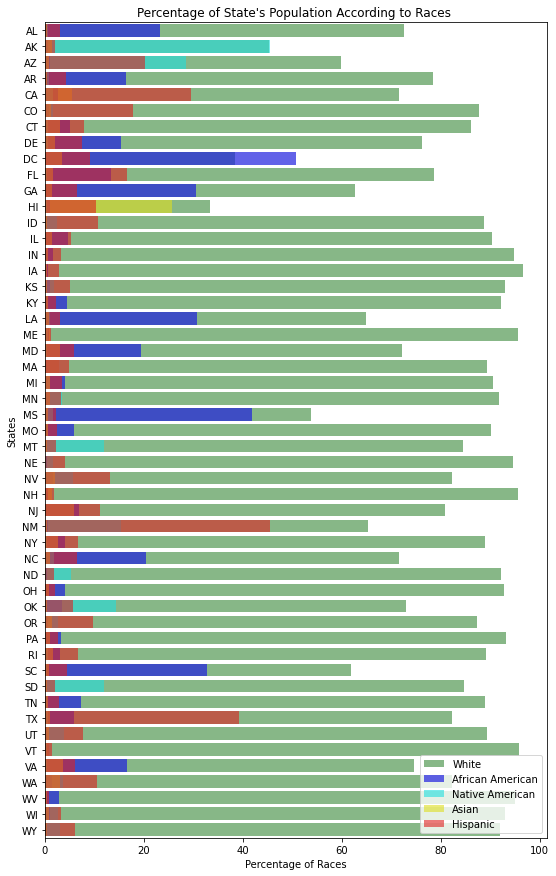

In [14]:
f,ax = plt.subplots(figsize = (9,15))
sns.barplot(x=share_white,y=area_list,color='green',alpha = 0.5,label='White' )
sns.barplot(x=share_black,y=area_list,color='blue',alpha = 0.7,label='African American')
sns.barplot(x=share_native_american,y=area_list,color='cyan',alpha = 0.6,label='Native American')
sns.barplot(x=share_asian,y=area_list,color='yellow',alpha = 0.6,label='Asian')
sns.barplot(x=share_hispanic,y=area_list,color='red',alpha = 0.6,label='Hispanic')
ax.legend(loc='lower right',frameon = True)  
ax.set(xlabel='Percentage of Races', ylabel='States',title = "Percentage of State's Population According to Races ");

## Omicidi per etnia

<AxesSubplot:xlabel='race', ylabel='count'>

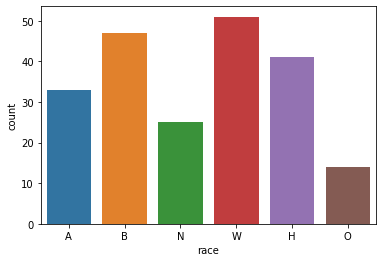

In [38]:
sns.countplot(x="race", data = df, )

## Calcolo città più pericolose

In [39]:
lista = dfk.groupby(["city","state"])["killed"].sum().reset_index().sort_values("killed",ascending=False)[:12]
lista

,city,state,killed
1651,Los Angeles,CA,114
2220,Phoenix,AZ,82
1298,Houston,TX,65
2490,San Antonio,TX,57
1536,Las Vegas,NV,52
498,Chicago,IL,47
33,Albuquerque,NM,41
1365,Jacksonville,FL,39
2067,Oklahoma City,OK,37
604,Columbus,OH,35


In [42]:
città = []
for i in lista["city"]:
    città.append(i)
stato = []
for y in lista["state"]:
    stato.append(y)
stato

['CA', 'AZ', 'TX', 'TX', 'NV', 'IL', 'NM', 'FL', 'OK', 'OH', 'CO', 'MO']

In [43]:
filtered1 = dfc[dfc["city"].isin(città)]
filtered2 = filtered1[filtered1["state"].isin(stato)]
filtered2

,city,state,population,lat,lng
183,Phoenix,AZ,4081849.0,33.5722,-112.0891
375,Los Angeles,CA,12815475.0,34.1139,-118.4068
559,Denver,CO,2787266.0,39.7621,-104.8759
703,Jacksonville,FL,1156291.0,30.3322,-81.6749
993,Chicago,IL,8675982.0,41.8373,-87.6862
1507,St. Louis,MO,2078283.0,38.6358,-90.2451
1755,Albuquerque,NM,758523.0,35.1053,-106.6464
1798,Las Vegas,NV,2073045.0,36.2333,-115.2654
1888,Columbus,OH,1528314.0,39.9860,-82.9851
2016,Oklahoma City,OK,955998.0,35.4676,-97.5137


Text(0.5, 1.0, 'Most dangerous cities')

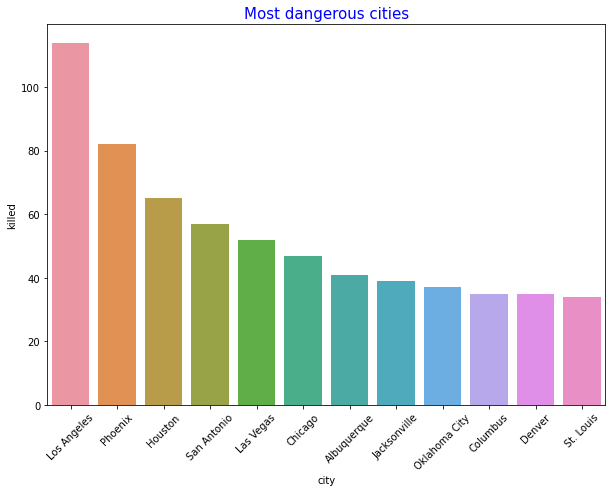

In [44]:
plt.figure(figsize=(10,7))
sns.barplot(x=lista["city"],y=lista["killed"])
plt.xticks(rotation=45)
plt.title('Most dangerous cities',color = 'blue',fontsize=15)

In [45]:
filmer = lista.merge(filtered2, left_on="city",right_on="city")

In [61]:
cowsay.cow('Analizziamo i tipi di threat !')

  ______________________________
| Analizziamo i tipi di threat ! |
                              \
                               \
                                 ^__^
                                 (oo)\_______
                                 (__)\       )\/\
                                     ||----w |
                                     ||     ||


In [62]:
dfk[dfk["race"]=="B"].groupby(["race","threat_level"])["threat_level"].count()

race  threat_level
B     attack          1138
      other            514
      undetermined      68
Name: threat_level, dtype: int64

In [63]:
dfk[dfk["race"]=="W"].groupby(["race","threat_level"])["threat_level"].count()

race  threat_level
W     attack          2108
      other           1027
      undetermined     105
Name: threat_level, dtype: int64

In [64]:
#città con più omicidi di persone nere
lf = dfk[dfk["race"]=="B"].groupby(["race","city","state"])["killed"].count().sort_values(ascending=False)[:10].reset_index()
lf

,race,city,state,killed
0,B,Chicago,IL,37
1,B,Houston,TX,37
2,B,St. Louis,MO,28
3,B,Los Angeles,CA,26
4,B,Atlanta,GA,25
5,B,Baltimore,MD,24
6,B,Columbus,OH,24
7,B,New York,NY,21
8,B,Jacksonville,FL,20
9,B,Philadelphia,PA,20


In [65]:
#città con più omicidi di persone bianche
dfk[dfk["race"]=="W"].groupby(["race","city"])["killed"].count().sort_values(ascending=False)[:10].reset_index()

,race,city,killed
0,W,Phoenix,31
1,W,Las Vegas,24
2,W,Austin,19
3,W,Los Angeles,18
4,W,Tulsa,17
5,W,Jacksonville,16
6,W,Portland,16
7,W,Springfield,16
8,W,Mesa,15
9,W,Louisville,15


In [66]:
gdf = dfk.groupby(["race","body_camera"])["killed"].count().reset_index()
gdf

,race,body_camera,killed
0,A,False,89
1,A,True,24
2,B,False,1384
3,B,True,336
4,H,False,973
5,H,True,171
6,N,False,85
7,N,True,17
8,O,False,41
9,O,True,6


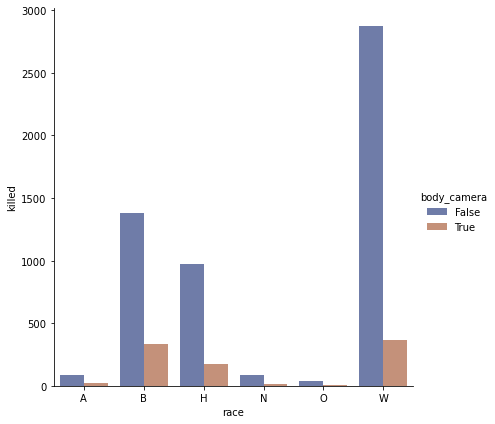

In [67]:
#analisi omicidi con e senza bodycamera per razza
g = sns.catplot(
    data=gdf, kind="bar",
    x="race", y="killed", hue="body_camera", palette="dark", alpha=.6, height=6)

In [68]:
filtered2.sort_values("population", ascending=False)

,city,state,population,lat,lng
375,Los Angeles,CA,12815475.0,34.1139,-118.4068
993,Chicago,IL,8675982.0,41.8373,-87.6862
2419,Houston,TX,5446468.0,29.7869,-95.3905
183,Phoenix,AZ,4081849.0,33.5722,-112.0891
559,Denver,CO,2787266.0,39.7621,-104.8759
1507,St. Louis,MO,2078283.0,38.6358,-90.2451
1798,Las Vegas,NV,2073045.0,36.2333,-115.2654
2493,San Antonio,TX,2002530.0,29.4658,-98.5254
1888,Columbus,OH,1528314.0,39.9860,-82.9851
703,Jacksonville,FL,1156291.0,30.3322,-81.6749


<Figure size 1080x720 with 0 Axes>

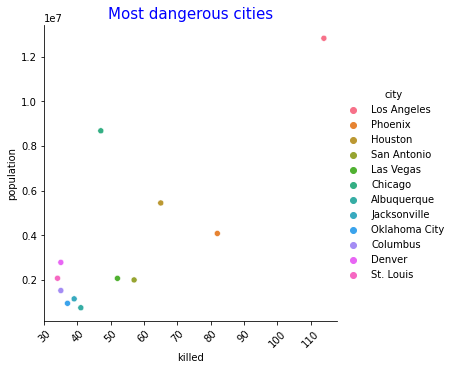

In [69]:
plt.figure(figsize=(15,10))
sns.relplot(x=filmer["killed"],y=filmer["population"],hue=filmer["city"]) 
plt.xticks(rotation=45)
plt.title('Most dangerous cities',color = 'blue',fontsize=15); 

# Grafico finale con omicidi per razza per stato

In [70]:
dfcsummed = dfc.groupby("state")["population"].sum().reset_index()
dfcsummed = dfcsummed.merge(dfnew, left_on="state",right_on="Geographic area")

In [71]:
kills = dfk.groupby("state")["race"].value_counts().unstack(fill_value=0).stack().reset_index(name="counts")

In [72]:
dfcsummed['W'] = list(kills.counts[(kills.race == 'W')])
dfcsummed['B'] = list(kills.counts[(kills.race == 'B')])
dfcsummed['H'] = list(kills.counts[(kills.race == 'H')])
dfcsummed['N'] = list(kills.counts[(kills.race == 'N')])
dfcsummed['A'] = list(kills.counts[(kills.race == 'A')])

In [73]:
dfcsummed["total_white"] = dfcsummed["population"] * dfcsummed["share_white"] /100
dfcsummed["total_black"] = dfcsummed["population"] * dfcsummed["share_black"] /100
dfcsummed["total_native_american"] = dfcsummed["population"] * dfcsummed["share_native_american"] /100
dfcsummed["total_asian"] = dfcsummed["population"] * dfcsummed["share_asian"] /100
dfcsummed["total_hispanic"] = dfcsummed["population"] * dfcsummed["share_hispanic"] /100

In [74]:
dfcsummed['white_cases_rate'] = dfcsummed['W'] / dfcsummed['total_white'] * 100
dfcsummed['black_cases_rate'] = dfcsummed['B'] / dfcsummed['total_black'] * 100
dfcsummed['asian_cases_rate'] = dfcsummed['A'] / dfcsummed['total_asian'] * 100
dfcsummed['native_american_cases_rate'] = dfcsummed['N'] / dfcsummed['total_native_american'] * 100
dfcsummed['hispanic_cases_rate'] = dfcsummed['H'] / dfcsummed['total_hispanic'] * 100

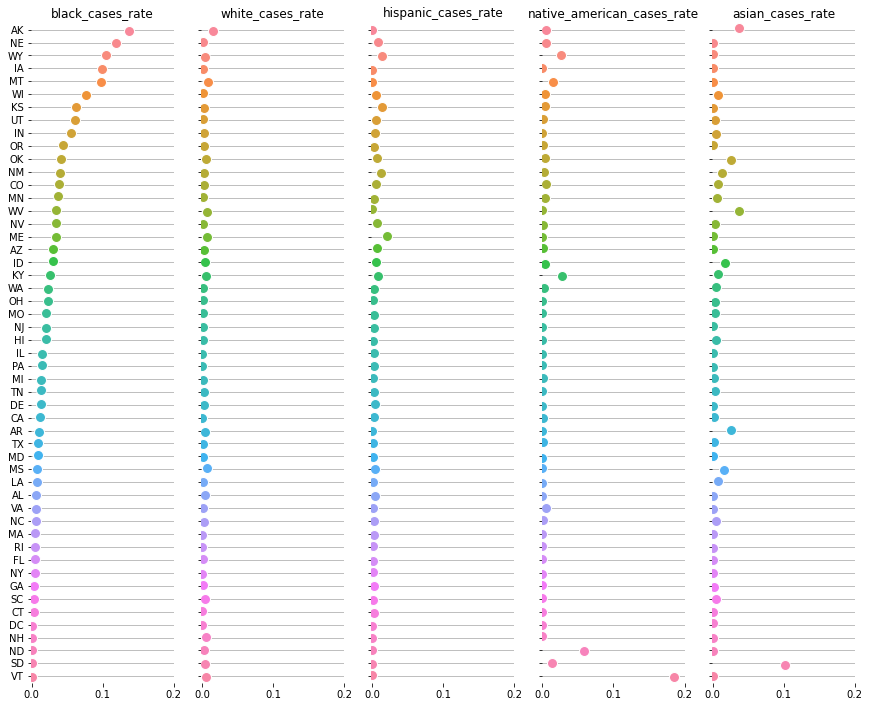

In [81]:
g = sns.PairGrid(dfcsummed.sort_values("black_cases_rate", ascending=False),
                 x_vars=['black_cases_rate','white_cases_rate','hispanic_cases_rate',
                         'native_american_cases_rate','asian_cases_rate'],
                 y_vars=['state'],
                 height=10, aspect=.25)

g.map(sns.stripplot, size=10, orient="h",linewidth=1, edgecolor="w")
g.set(xlim=(-0.001, 0.20), xlabel="", ylabel="")

titles = ['black_cases_rate','white_cases_rate','hispanic_cases_rate',
          'native_american_cases_rate','asian_cases_rate']

for ax, title in zip(g.axes.flat, titles):
    ax.set(title=title)
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

In [75]:
cowsay.cow('Secondo mucca si nota un effettivo bias razziale')

  ________________________________________________
| Secondo mucca si nota un effettivo bias razziale |
                                                \
                                                 \
                                                   ^__^
                                                   (oo)\_______
                                                   (__)\       )\/\
                                                       ||----w |
                                                       ||     ||
